In [1]:
# for dataset
# https://www.kaggle.com/datasets/jmcaro/wheat-seedsuci?resource=download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seeds = pd.read_csv("datasets/seeds.csv")
seeds.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
seeds.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [4]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [5]:
types_seeds = list(seeds['Type'].unique())
seeds['Type'].value_counts(ascending=True)

Type
3    65
1    66
2    68
Name: count, dtype: int64

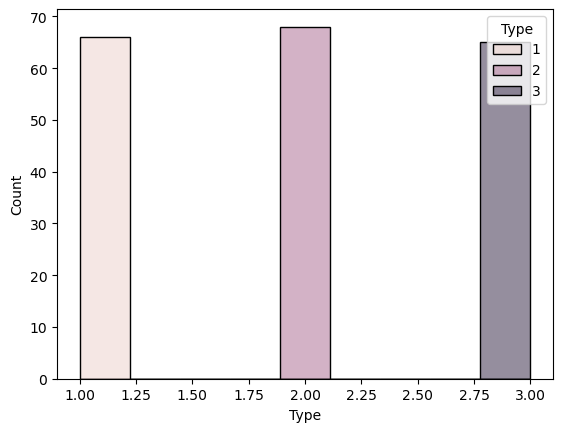

In [6]:
sns.histplot(seeds, x='Type', hue="Type");

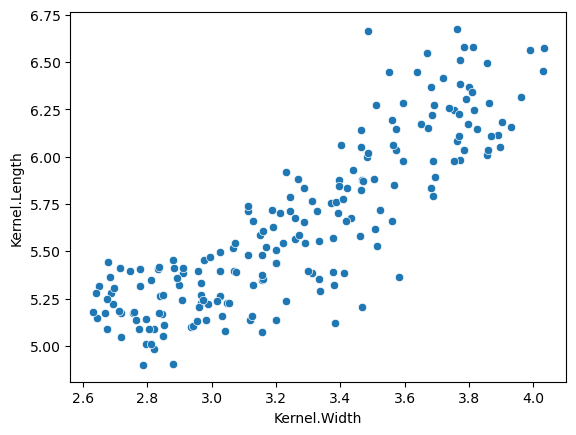

In [7]:
sns.scatterplot(x=seeds['Kernel.Width'],y=seeds['Kernel.Length']);  

from the scatter plot we can conclude that there is a relationship between kernel length and the width, there is a linear relationship - as length increases the width increases. They are correlated features

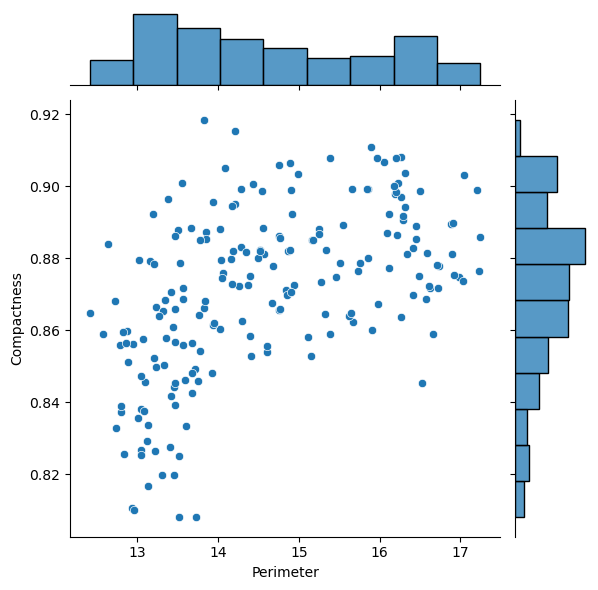

In [8]:
sns.jointplot(data=seeds, x='Perimeter', y='Compactness');

We can concluded there is no correlation betweeen Perimeter and Compatness of the seeds. The graph is complete scatter

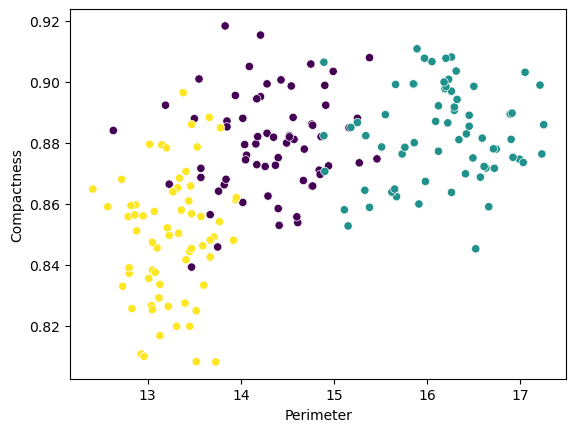

In [9]:
sns.scatterplot(data=seeds,x='Perimeter',y='Compactness',c=seeds['Type']);

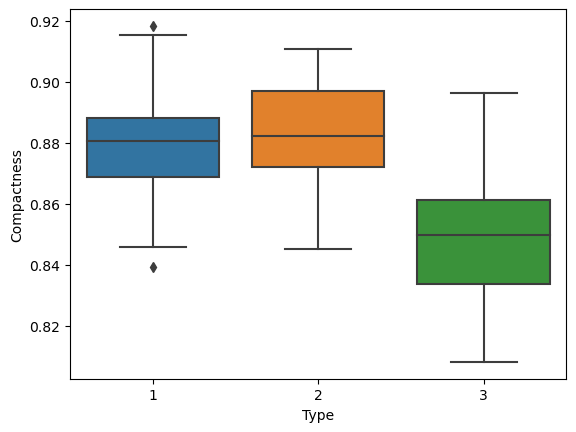

In [10]:
sns.boxplot(data=seeds,x='Type',y='Compactness');

The oberservation form the boxplot conclude

*   Type 1 Seeds has Outliers to the data
*   All the types have different interquartile range


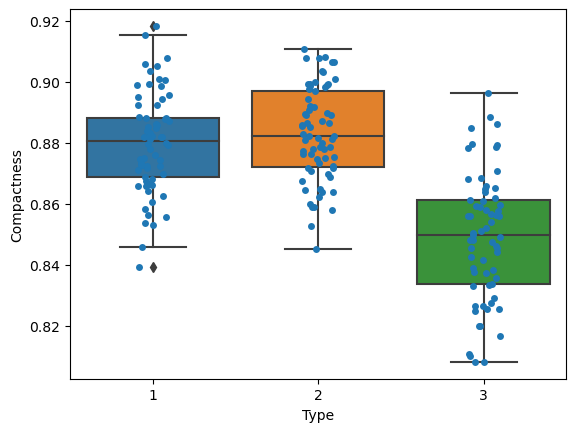

In [11]:
ax1 = sns.boxplot(data=seeds,x='Type',y='Compactness');
ax2 = (sns.stripplot(data=seeds,x='Type',y='Compactness', jitter=True));

Thus we can visualise the range of different outliers

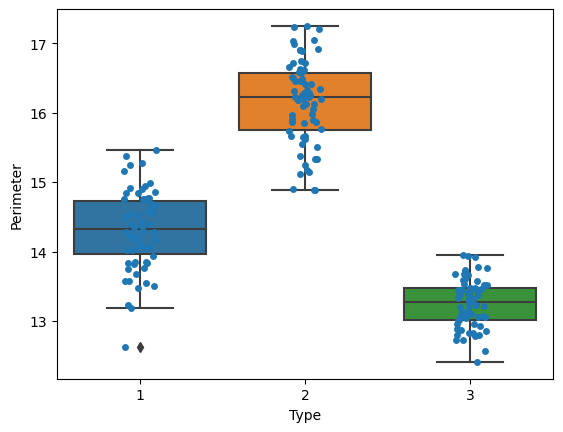

In [12]:
ax1 = sns.boxplot(data=seeds,x='Type',y='Perimeter');
ax2 = (sns.stripplot(data=seeds,x='Type',y='Perimeter', jitter=True));

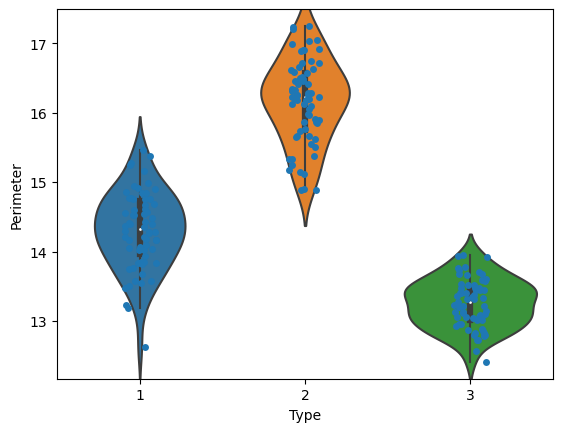

In [13]:
ax1 = sns.violinplot(data=seeds,x='Type',y='Perimeter');
ax2 = sns.stripplot(data=seeds,x='Type',y='Perimeter', jitter=True)

Maximum desnity of the features is seen by width in the graph due to violin plot . The shape is determined by distribution of range of the feature

C:\Users\atind\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


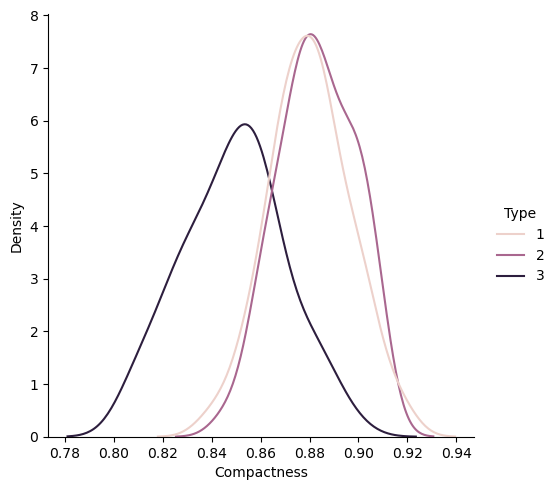

In [14]:
sns.displot(data=seeds,x='Compactness',kind="kde",hue='Type');

For the three types Type 2 is the most compact and Type 3 is most distributed.
Also, Type 2 and 1 have overlapping in the grpah.This for classifying it is difficult to differentiate between Type 1 and 2.

C:\Users\atind\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


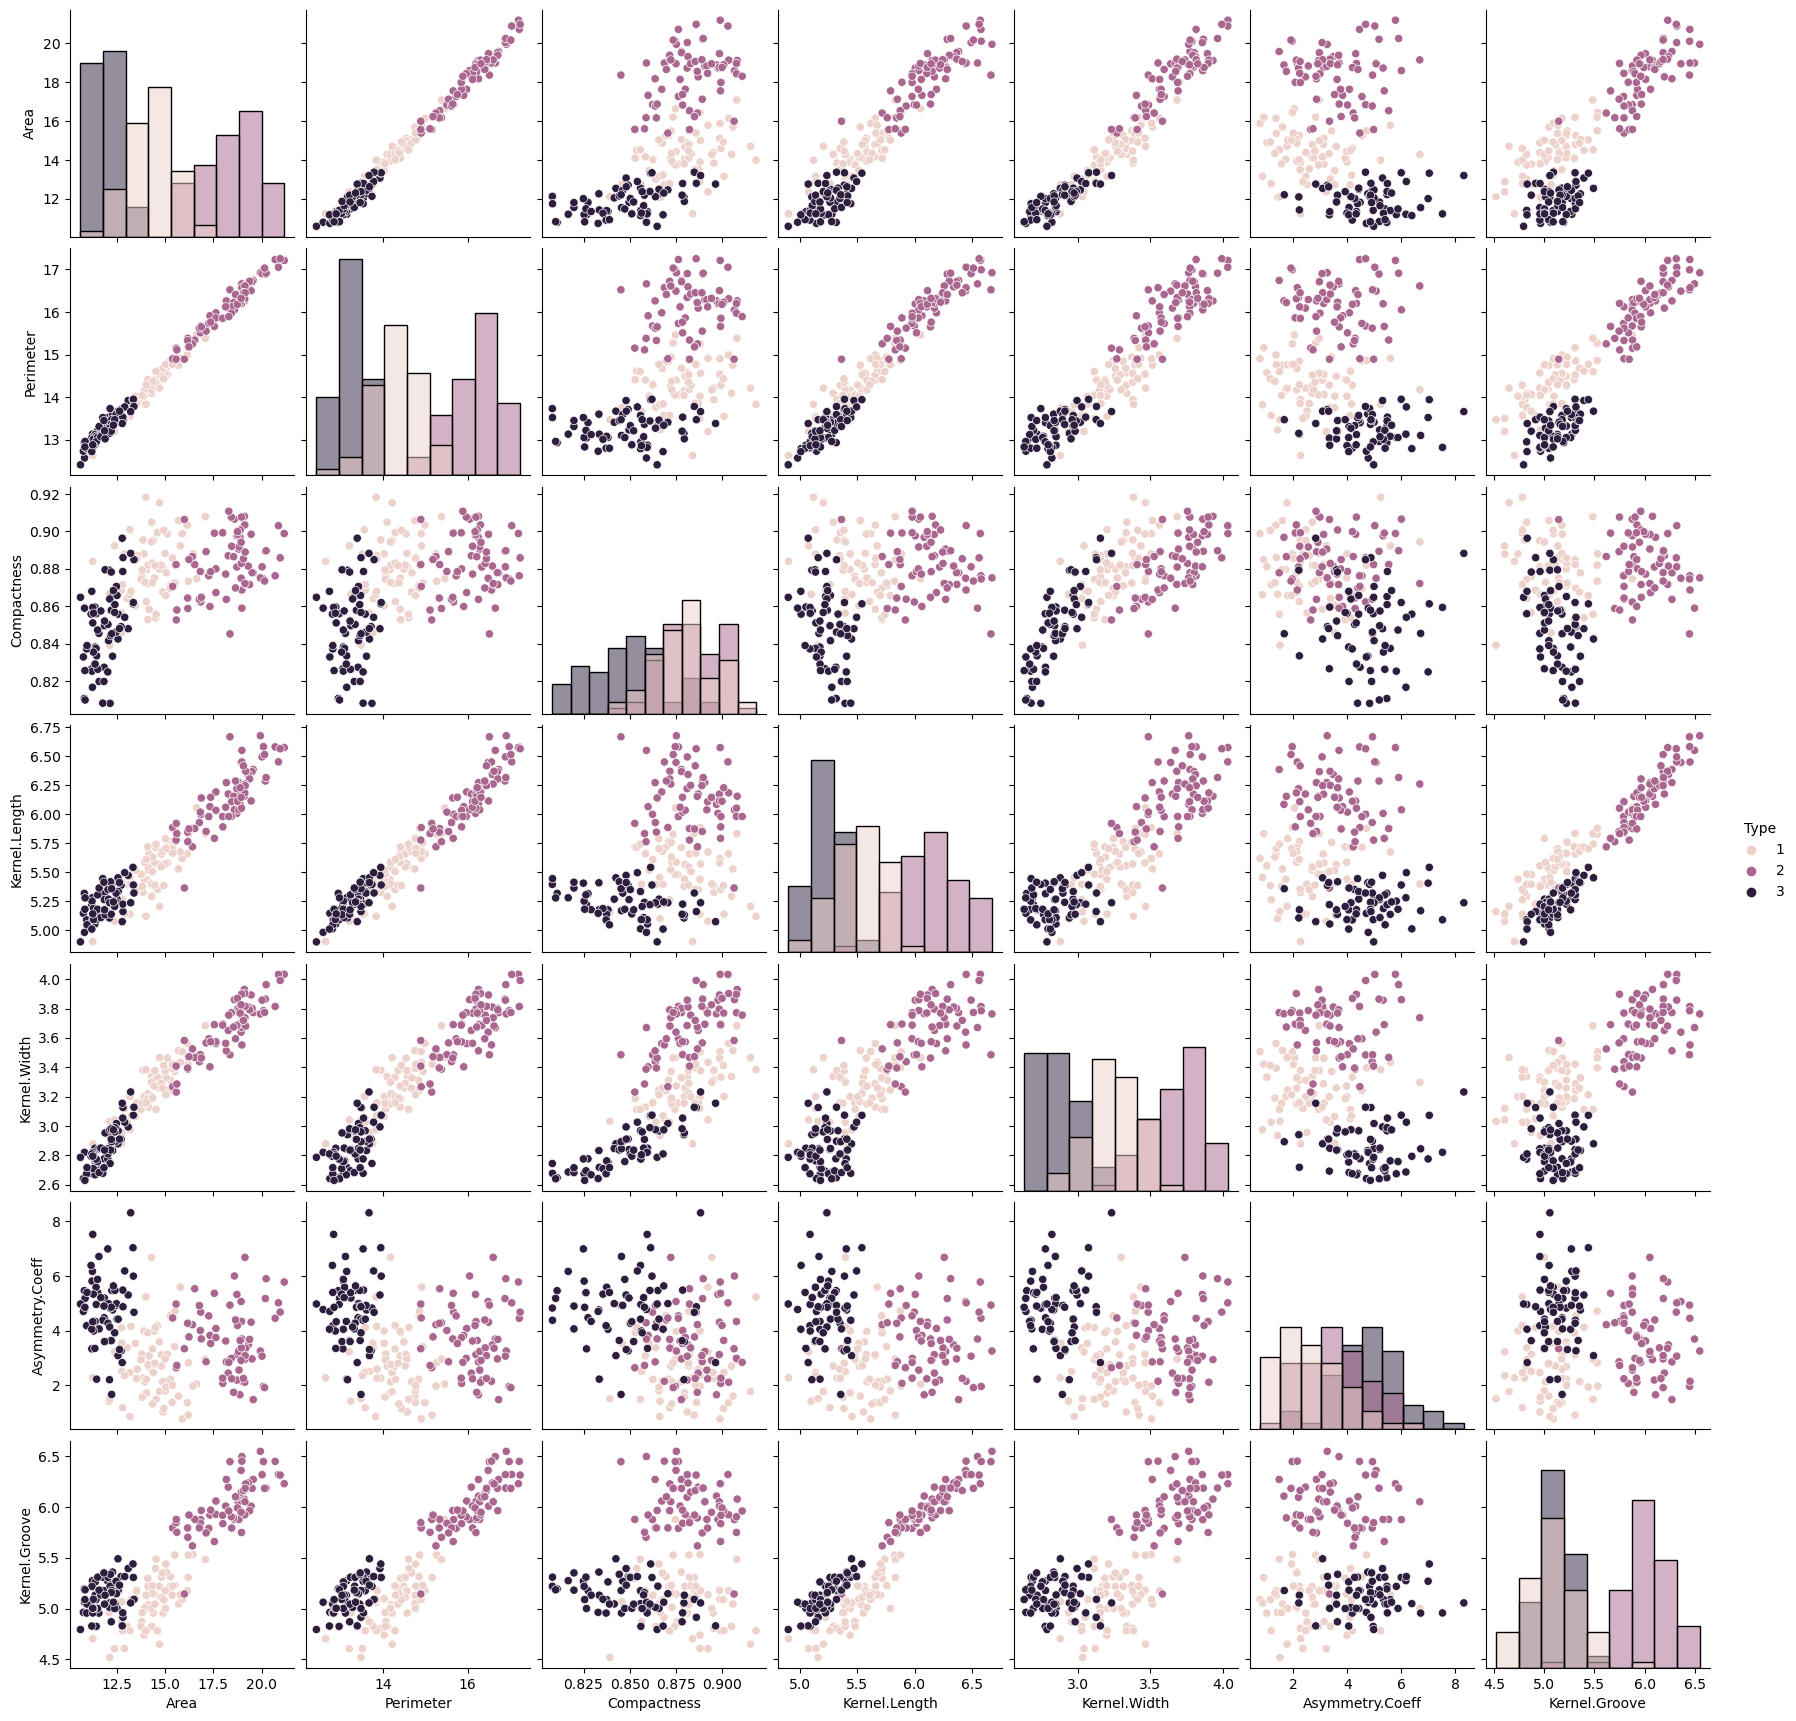

In [15]:
sns.pairplot(seeds, hue='Type', diag_kind="hist");

Gives us the relation between all the features in the dataframe. Here we get a 2D 7x7 plot. The diagonal values are feature plotted against itself. The correlated fearues are :

*   Area and Perimeter
*   Kernel Width and Compactness
*   Kernel Groove and Kernel Length

The rest are all correlated




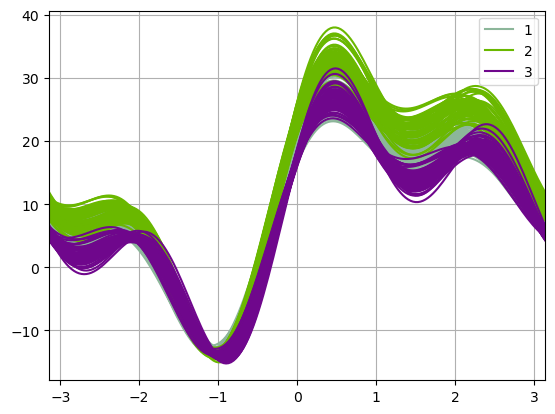

In [16]:
pd.plotting.andrews_curves(seeds, 'Type');